In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio

In [22]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [2]:
tileid_list = [80607, 80609, 80620]

In [26]:
#some criteria
fail_threshold = 0.0033
deep_dchi2 = 10#0
mindepth = 120

Tile 80607
28454 1922 6097.749969482422
22933
number, fraction of failures, fraction of failures with zwarn==0
20126 0.13003080592268706 0.09351088144688463
Tile 80609
29750 2125 4106.550003051758
23520
number, fraction of failures, fraction of failures with zwarn==0
21004 0.15616073128927824 0.11750142829937155
Tile 80620
20303 2049 4787.799987792969
15396
number, fraction of failures, fraction of failures with zwarn==0
12905 0.10298333979077877 0.07570709027508718


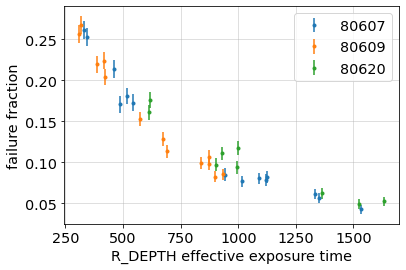

In [27]:
for td in tileid_list:
    
    print('Tile {}'.format(td))
    
    f = fitsio.read('/project/projectdirs/desi/users/ajross/catalogs/SV/redshift_comps/testRP/'+str(td)+'_LRGzinfo.fits')
    #f = fitsio.read('/project/projectdirs/desi/users/ajross/catalogs/SV/redshift_comps/test/'+str(td)+'_LRGzinfo.fits') #fitsio *much* faster than using Table here
    deep = f[f['subset']=='deep'] 
    min_depth = np.max(deep['R_DEPTH'])/2
    print(len(f),len(deep),min_depth)
    
    #get list of truez in appropriate rows, matching Rongpu's definition for criteria required to allow truth determination
    #rows without truth have z==0
    mzl = np.zeros(len(f))
    tids = np.unique(f['TARGETID'])
    for iid in tids:
        sf = f['TARGETID'] == iid
        fi = f[sf]
        fd = fi[fi['subset']=='deep']
        mask = fd['FIBERSTATUS']==0 # Remove FIBERSTATUS!=0 fibers
        mask &= fd['ZWARN'] & 2**9==0 # Remove "no data" fibers
        mask &= fd['ZWARN']==0
        mask &= fd['R_DEPTH'] > min_depth
        mask &= fd['DELTACHI2'] > deep_dchi2
        if len(fd[mask]) > 0:
            mzl[sf] = fd['Z']
    
    w = mzl != 0
    print(len(mzl[w]))
    tf = Table(f)
    tf['Z_TRUTH'] = mzl
    masknight = tf['subset'] != 'deep'
    masknight &= tf['subset'] != 'all'
    masknight &= tf['Z_TRUTH'] != 0
    masknight &= tf['FIBERSTATUS']==0
    masknight &= tf['ZWARN'] & 2**9==0
    tcomp = tf[masknight]
    dz = tcomp['Z'] - tcomp['Z_TRUTH']
    bz = abs(dz) > fail_threshold
    bzz = bz & (tcomp['ZWARN'] != 0)
    print('number, fraction of failures, fraction of failures with zwarn==0')
    print(len(tcomp),len(tcomp[bz])/len(tcomp),len(tcomp[bzz])/len(tcomp))
    rvals = np.unique(tcomp['R_DEPTH'])
    ff = []
    rv = []
    nb = []
    nt = []
    for rval in rvals:
        ds = tcomp[tcomp['R_DEPTH']==rval]
        dz = ds['Z'] - ds['Z_TRUTH']
        bz = abs(dz) > fail_threshold
        #if len(ds) > 30 and rval > mindepth:
        ff.append(len(ds[bz])/len(ds))
        nb.append(len(ds[bz]))
        nt.append(len(ds))
        rv.append(rval)
    nt = np.array(nt)
    nb = np.array(nb)
    err = ((nt-nb)*(1.-(nt-nb)/nt))**.5/nt #binomial error formula, needs double-check
    plt.errorbar(rv,ff,err,fmt='.',label=td)

plt.legend()
plt.grid(alpha=0.5)
plt.xlabel('R_DEPTH effective exposure time')
plt.ylabel('failure fraction')
plt.show()    
    

    

In [9]:
f = Table.read('/project/projectdirs/desi/users/ajross/catalogs/SV/redshift_comps/testRP/'+str(td)+'_LRGzinfo.fits')

In [17]:
for col in f.columns:
    print(col)

TARGETID
CHI2_1
COEFF_1
Z_1
ZERR_1
ZWARN_1
NPIXELS_1
SPECTYPE_1
SUBTYPE_1
NCOEFF_1
DELTACHI2_1
NUMEXP_1
NUMTILE_1
PETAL_LOC_1
DEVICE_LOC_1
LOCATION_1
FIBER_1
FIBERSTATUS_1
TARGET_RA_1
TARGET_DEC_1
PMRA_1
PMDEC_1
REF_EPOCH_1
LAMBDA_REF_1
FA_TARGET_1
FA_TYPE_1
OBJTYPE_1
FIBERASSIGN_X_1
FIBERASSIGN_Y_1
NUMTARGET_1
PRIORITY_1
SUBPRIORITY_1
OBSCONDITIONS_1
MORPHTYPE_1
FLUX_G_1
FLUX_R_1
FLUX_Z_1
FLUX_IVAR_G_1
FLUX_IVAR_R_1
FLUX_IVAR_Z_1
REF_ID_1
REF_CAT_1
GAIA_PHOT_G_MEAN_MAG_1
GAIA_PHOT_BP_MEAN_MAG_1
GAIA_PHOT_RP_MEAN_MAG_1
PARALLAX_1
EBV_1
FLUX_W1_1
FLUX_W2_1
FIBERFLUX_G_1
FIBERFLUX_R_1
FIBERFLUX_Z_1
FIBERTOTFLUX_G_1
FIBERTOTFLUX_R_1
FIBERTOTFLUX_Z_1
MASKBITS_1
SERSIC_1
SHAPE_R_1
SHAPE_E1_1
SHAPE_E2_1
PHOTSYS_1
SV1_DESI_TARGET_1
SV1_BGS_TARGET_1
SV1_MWS_TARGET_1
PRIORITY_INIT_1
NUMOBS_INIT_1
RELEASE_1
BRICKID_1
BRICKNAME_1
BRICK_OBJID_1
BLOBDIST_1
FIBERFLUX_IVAR_G_1
FIBERFLUX_IVAR_R_1
FIBERFLUX_IVAR_Z_1
DESI_TARGET_1
BGS_TARGET_1
MWS_TARGET_1
HPXPIXEL_1
NUM_ITER_1
FIBER_X_1
FIBER_Y_1
MEAN_

In [13]:
ff = fitsio.read('/project/projectdirs/desi/users/ajross/catalogs/SV/redshift_comps/test/'+str(td)+'_LRGzinfo.fits')

In [16]:
nl = []
for name in ff.dtype.names:
    nl.append(name)
f.keep_columns(nl)

KeyError: 'Column CHI2 does not exist'